In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [6]:
df = pd.read_excel("/Users/felipesick/Desktop/Mallet_implementation/articles.xlsx", index_col=0)
df.head()

,CR Report No,Company Name,Country,ISIN,Symbol,Exchange,Industry,Title,Broad Report Type,Report Type,...,Region,GRI,GRI Adherence,IIRC,IIRC Adherence,External Assurance,Name of Assuror,PDF File Name,Text File Included,Report Language
CR Company No,,,,,,,,,,,,,,,,,,,,,
20399,75514,A2A SpA,Italy,IT0001233417,A2A,BIT,Utilities,2014 Sustainability Report,Standalone Report,'Sustainable' (Environment/Social/Economic),...,Italy,True,G4 - Core,False,NaN,True,PricewaterhouseCoopers (Italy),75514-15Su-21672518T488953150X-It.pdf,True,English
32426,77653,AAK AB,Sweden,SE0011337708,AAK,STO,Consumer Goods,Sustainability Report 2014/2015. Responsible G...,Standalone Report,'Sustainable' (Environment/Social/Economic),...,Global,True,G3 Undeclared,False,NaN,False,(None),77653-15Su-20267433J4713226488V-Gl.pdf,True,English
15259,71125,Abengoa SA,Spain,ES0105200002,ABG,MCE,Industrials,Annual Report 2014. 02 Corporate Social Respon...,Standalone Report,'Corporate Responsibility' (EHS/Community/Social),...,Global,True,G4 - Comprehensive,True,Level 2,True,AENOR,71125-15Co-18065750K27718692750U-Gl.pdf,True,English
14801,74116,Abertis Infraestructuras SA,Spain,ES0111845014,ABE,MCE,Industrials,2014 Corporate Social Responsibility Report,Standalone Report,'Corporate Responsibility' (EHS/Community/Social),...,Global,True,G4 - Comprehensive,False,NaN,True,Deloitte SL (Spain),74116-15Co-18899580F19416020288W-Gl.pdf,True,English
3028,72535,ABN Amro Bank NV,The Netherlands,NL0000301109,AABA,AMS,Financials,Sustainability Report 2014,Standalone Report,'Sustainable' (Environment/Social/Economic),...,Global,True,G4 - Core,False,NaN,True,KPMG Sustainability BV,72535-15Su-15377420X29583399750R-Gl.pdf,False,English


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5559 entries, 20399 to 4206
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CR Report No        5559 non-null   int64 
 1   Company Name        5559 non-null   object
 2   Country             5559 non-null   object
 3   ISIN                5200 non-null   object
 4   Symbol              5559 non-null   object
 5   Exchange            5559 non-null   object
 6   Industry            5559 non-null   object
 7   Title               5559 non-null   object
 8   Broad Report Type   5559 non-null   object
 9   Report Type         5559 non-null   object
 10  Year                5559 non-null   int64 
 11  Period From         5092 non-null   object
 12  Period To           5092 non-null   object
 13  Region              5559 non-null   object
 14  GRI                 5559 non-null   bool  
 15  GRI Adherence       5106 non-null   object
 16  IIRC                

In [8]:
df.Industry.value_counts()

Industrials           1484
Financials            1063
Consumer Goods         781
Basic Materials        563
Consumer Services      499
Utilities              287
Technology             250
Oil & Gas              236
Health Care            213
Telecommunications     176
Other                    7
Name: Industry, dtype: int64

In [9]:
df.Country.value_counts()

Germany                       612
Italy                         599
Sweden                        575
UK                            557
France                        500
Switzerland                   430
Spain                         408
The Netherlands               347
Finland                       322
Norway                        216
Austria                       170
Greece                        159
Belgium                       151
Poland                         96
Portugal                       86
Denmark                        76
Luxembourg                     70
Republic of Ireland (Eire)     50
Romania                        25
Hungary                        19
Croatia                        18
Cyprus                         17
Czech Republic                 13
Lithuania                      11
Malta                           9
Liechtenstein                   8
Estonia                         7
Slovenia                        6
Iceland                         2
Name: Country,

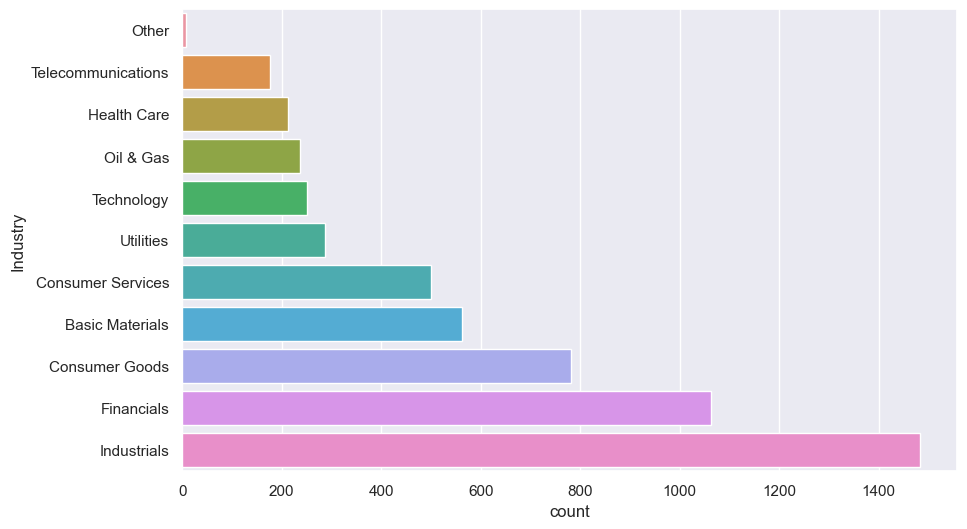

In [11]:
# order article counts per journal and get the index
order = df.Industry.value_counts(ascending=True).index

plt.figure(figsize=(10,6))
sns.countplot(y='Industry', data=df, orient='h', order=order);

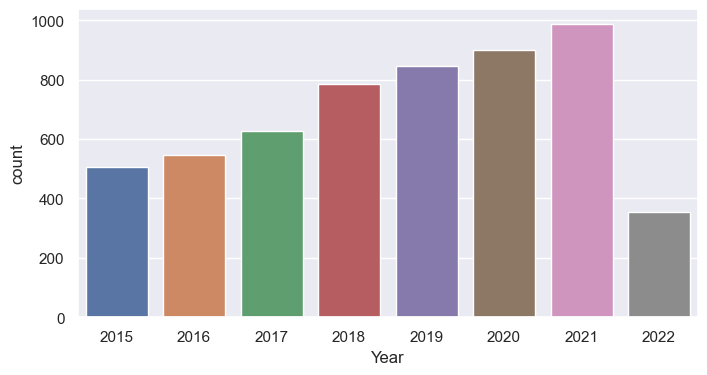

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df);

In [13]:
pd.crosstab(df.Industry, df.Year)

Year,2015,2016,2017,2018,2019,2020,2021,2022
Industry,,,,,,,,
Basic Materials,50,62,65,73,82,91,98,42
Consumer Goods,77,71,85,120,124,121,138,45
Consumer Services,43,54,62,74,85,82,77,22
Financials,77,94,115,150,163,185,200,79
Health Care,21,19,21,31,30,32,41,18
Industrials,142,154,176,208,223,227,261,93
Oil & Gas,23,25,25,31,36,42,44,10
Other,0,0,0,1,2,2,2,0
Technology,24,21,23,35,35,42,50,20


/Users/felipesick/miniforge3/lib/python3.9/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


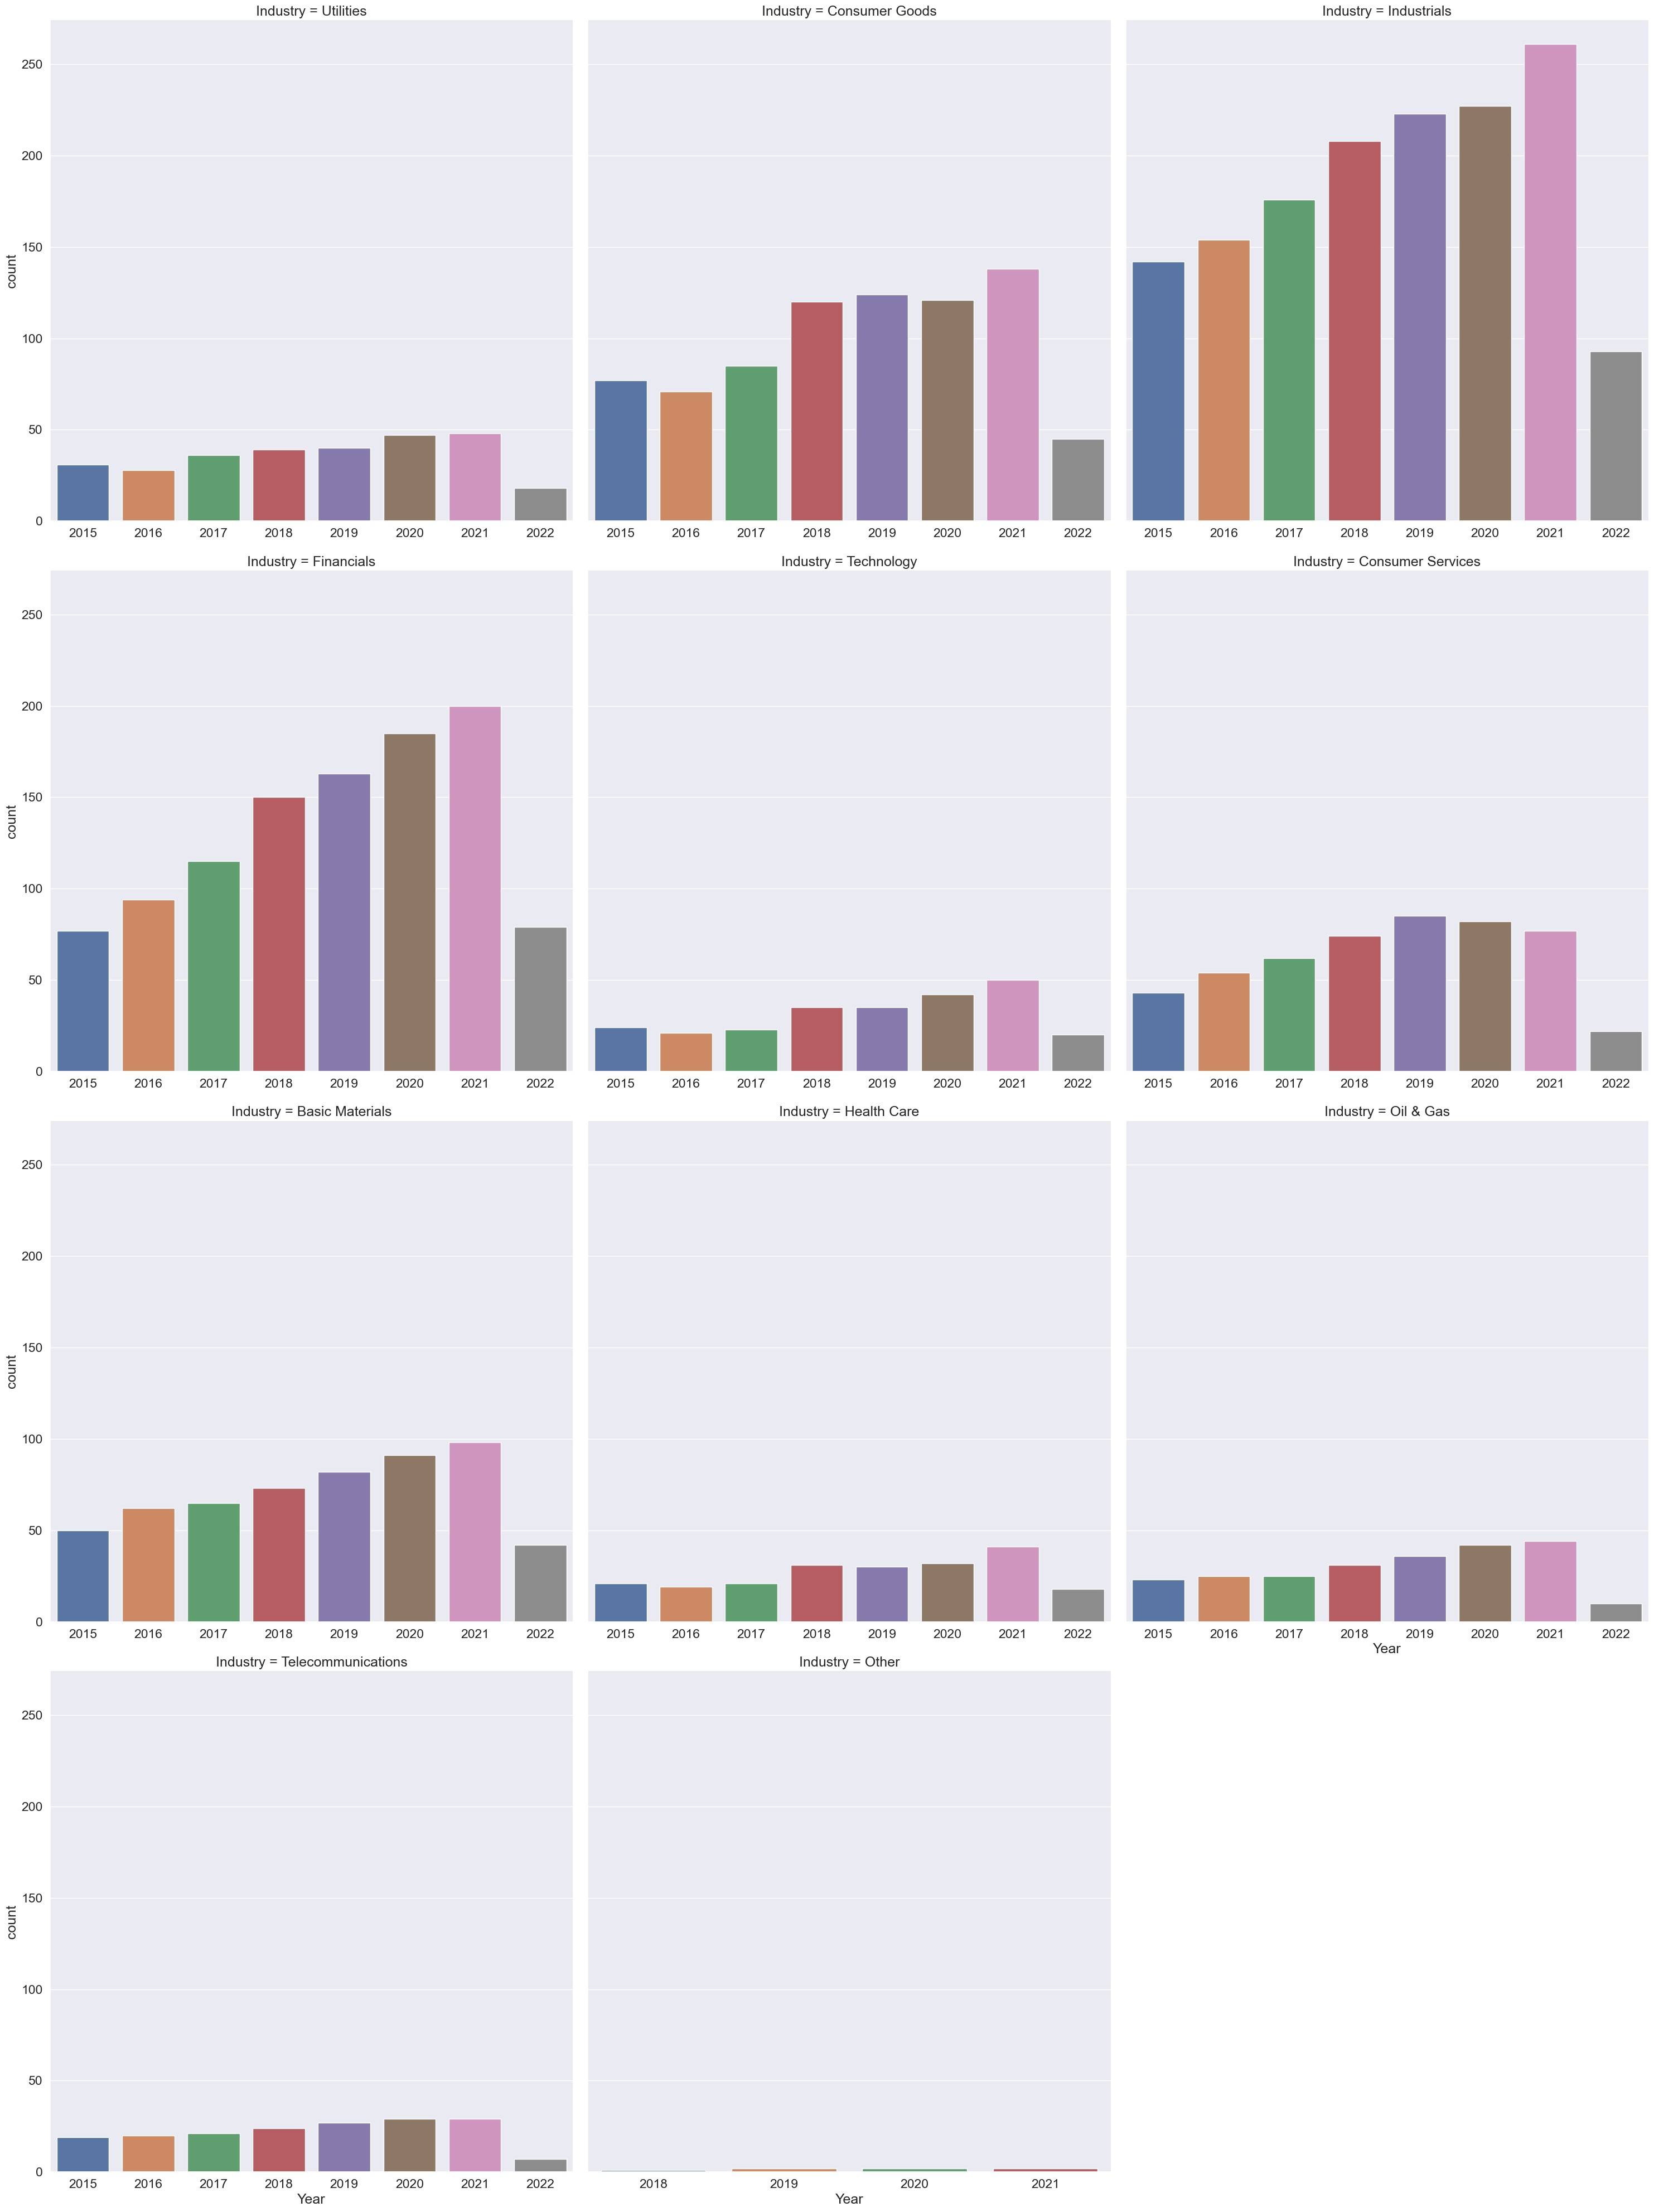

In [14]:
sns.set(font_scale=1.5)
sns.catplot(data=df, x='Year', col="Industry", col_wrap=3, sharex=False, height=10, kind='count');

From here Topic Modeling

In [ ]:
import nltk 
nltk.download('stopwords')
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy